**Dataset Info:** Sample Data Set containing customer data and showing customers who have left last month

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('D:\EDA\Churn_Modelling.csv')

In [7]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df_new = df[['Geography', 'Gender', 'Exited']]

In [9]:
df_new.head(5)

,Geography,Gender,Exited
0,France,Female,1
1,Spain,Female,0
2,France,Female,1
3,France,Female,0
4,Spain,Female,0


In [11]:
df_new.Exited.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [12]:
df_new.Exited.value_counts()/len(df_new)*100

Exited
0    79.63
1    20.37
Name: count, dtype: float64

### Univariate Analysis

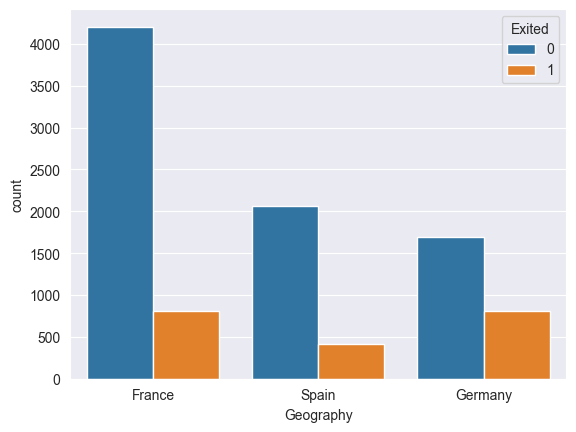

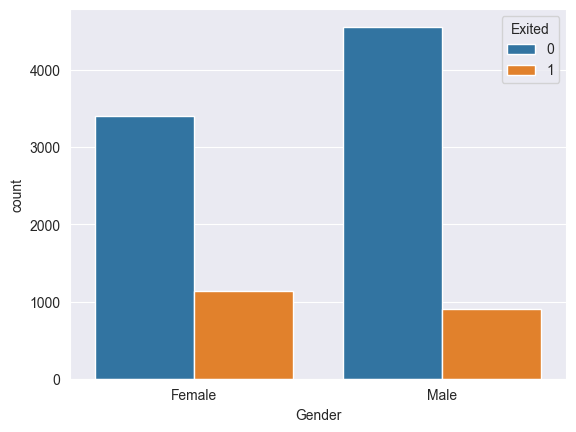

In [10]:
for i, predictor in enumerate(df_new.drop(columns=['Exited'])):
    plt.figure()
    sns.countplot(data=df_new, x=predictor, hue='Exited')

### Bivariate Analysis

<Axes: xlabel='Gender', ylabel='Count'>

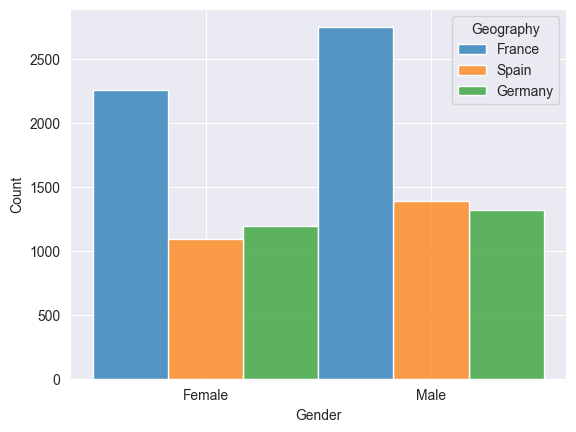

In [13]:
sns.histplot(x='Gender', hue='Geography', data=df_new, stat="count", multiple="dodge")

<Axes: xlabel='Gender', ylabel='Count'>

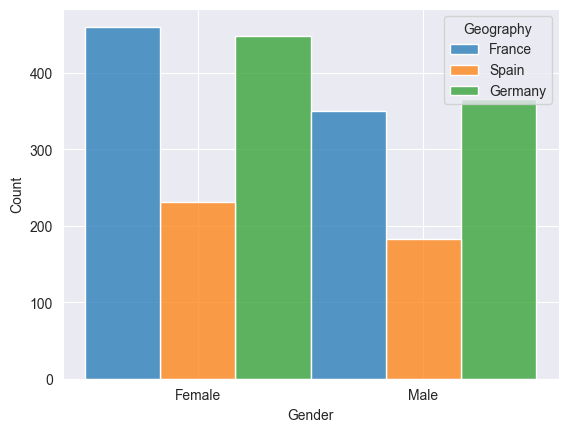

In [15]:
df_new_target1 = df_new.loc[df_new["Exited"]==1]
sns.histplot(x='Gender', hue='Geography', data=df_new_target1, stat="count", multiple="dodge")

### Numerical Analysis

 Correlation: it ranges from -1 to +1
 - +1 --> Positive Correlation
 - -1 --> Negative Correlation
 - ~0 --> No Correlation

In [21]:
df_new_target2 = df.drop(columns=['Surname', 'Geography', 'Gender'])
df_new_target2.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


<Axes: >

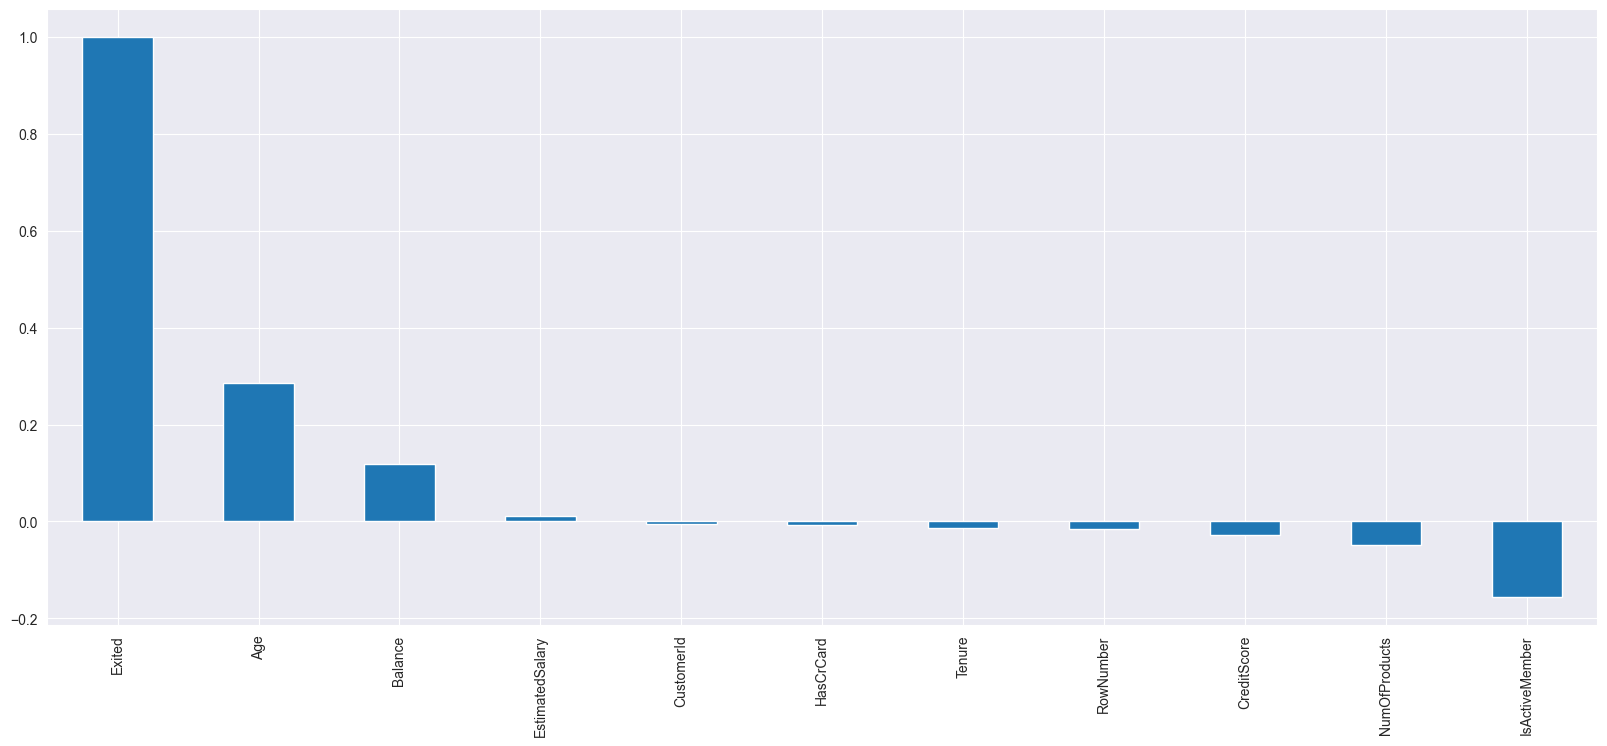

In [22]:
plt.figure(figsize=(20,8))
df_new_target2.corr()['Exited'].sort_values(ascending=False).plot(kind='bar')

<Axes: >

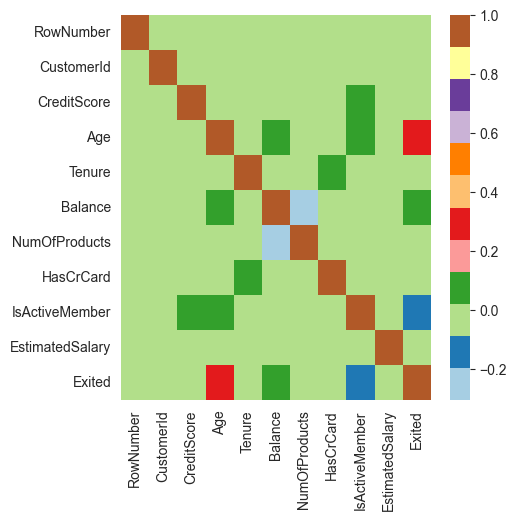

In [24]:
plt.figure(figsize=(5,5))
sns.heatmap(df_new_target2.corr(), cmap='Paired')

<Axes: xlabel='Age'>

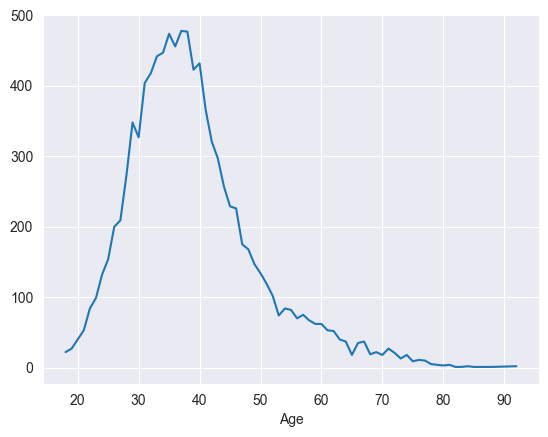

In [25]:
 df['Age'].value_counts().sort_index(ascending=True).plot()

C:\Users\amir\AppData\Local\Temp\ipykernel_9608\3107257844.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(df.Age[(df["Exited"]==0)], color="Red", shade=True)
C:\Users\amir\AppData\Local\Temp\ipykernel_9608\3107257844.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(df.Age[(df["Exited"]==1)], color="Blue", shade=True)


Text(0.5, 1.0, 'Age by churn')

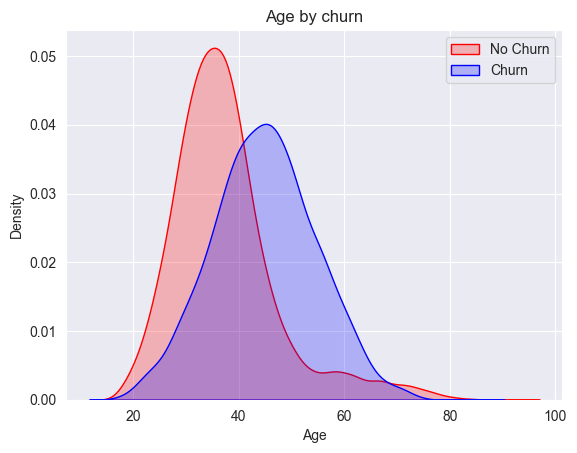

In [26]:
Tot = sns.kdeplot(df.Age[(df["Exited"]==0)], color="Red", shade=True)
Tot = sns.kdeplot(df.Age[(df["Exited"]==1)], color="Blue", shade=True)
Tot.legend(["No Churn", "Churn"], loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Age')
Tot.set_title("Age by churn")

C:\Users\amir\AppData\Local\Temp\ipykernel_9608\77683403.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(df.Tenure[(df["Exited"]==0)], color="Red", shade=True)
C:\Users\amir\AppData\Local\Temp\ipykernel_9608\77683403.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(df.Tenure[(df["Exited"]==1)], color="Blue", shade=True)


Text(0.5, 1.0, 'Tenure by churn')

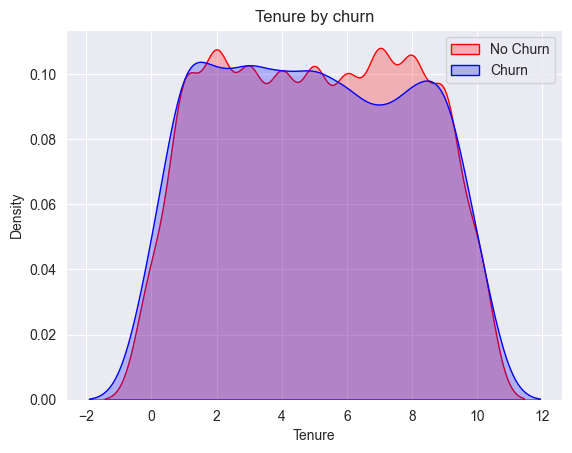

In [27]:
Tot = sns.kdeplot(df.Tenure[(df["Exited"]==0)], color="Red", shade=True)
Tot = sns.kdeplot(df.Tenure[(df["Exited"]==1)], color="Blue", shade=True)
Tot.legend(["No Churn", "Churn"], loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Tenure')
Tot.set_title("Tenure by churn")

C:\Users\amir\AppData\Local\Temp\ipykernel_9608\2903907872.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(df.Balance[(df["Exited"]==0)], color="Red", shade=True)
C:\Users\amir\AppData\Local\Temp\ipykernel_9608\2903907872.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(df.Balance[(df["Exited"]==1)], color="Blue", shade=True)


Text(0.5, 1.0, 'Balance by churn')

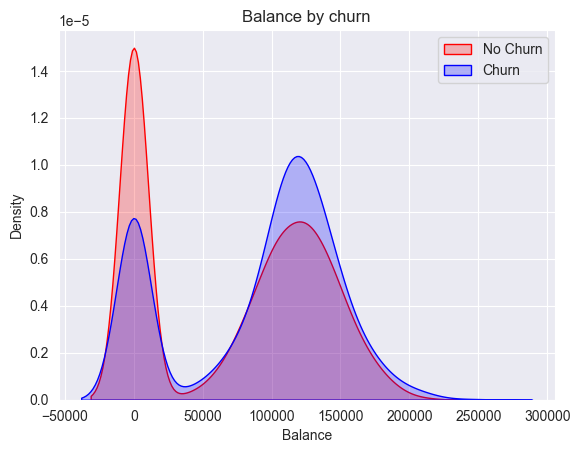

In [28]:
Tot = sns.kdeplot(df.Balance[(df["Exited"]==0)], color="Red", shade=True)
Tot = sns.kdeplot(df.Balance[(df["Exited"]==1)], color="Blue", shade=True)
Tot.legend(["No Churn", "Churn"], loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Balance')
Tot.set_title("Balance by churn")